In [1]:
# surveillance signal analysis and filtering project!
# focusing on Fourier transforms

# pip install numpy scipy matplotlib

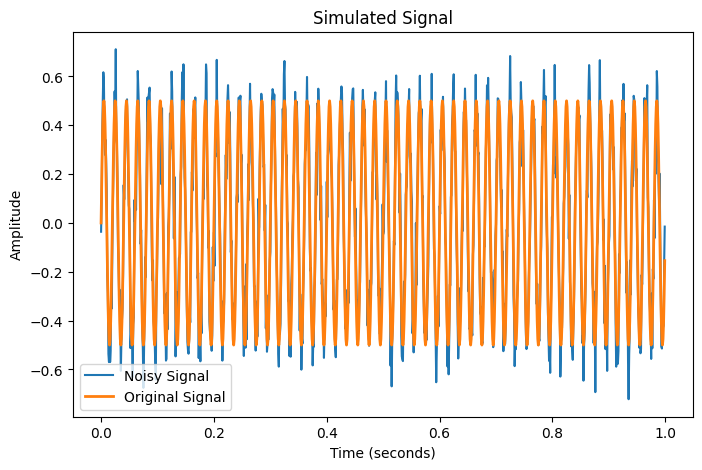

1.2246467991473532e-16

In [241]:
# we will need simulated data

import numpy as np
import matplotlib.pyplot as plt
from random import randint

# Parameters
fs = 1000  # Sampling frequency (Hz) - how many data points will represent the signal per second (1000/s)
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector

# Signal generation

# Simulating Signal Data

# Signal: we use a single sinusoidal wave - a basic form of a periodic signal represented by A * sin(2πft + φ) where A is amplitude, f is frequency, t is time, and φ is phase

# Noise: Random noise is added to the signal to simulate real-world conditions - used Gaussian noise

# frequency = randint(0,200) # Frequency of the signal
frequency = 50
signal = 0.5 * np.sin(2 * np.pi * frequency * t)  # Sine wave signal
# signal = np.sin(2* np.pi* t)
# A signal is a waveform/function of time = 1/2(sin(2pift)) = 1/2(sin(50pit))
noise = np.random.normal(0, 0.1, t.shape)  # Gaussian noise
mixed_signal = signal + noise  # Mixture of signal and noise

# Plotting the signal
plt.figure(figsize=(8, 5))
plt.plot(t, mixed_signal, label='Noisy Signal')
plt.plot(t, signal, label='Original Signal', linewidth=2)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Simulated Signal')
plt.show()
np.sin(2 * np.pi * frequency * 0.01) + 1
np.sin(np.pi)
# print(frequency)

[-0.43480637-0.00000000e+00j -4.74874068-2.60673032e+00j
 -2.1493122 +8.13866898e-01j  3.0899525 -7.81549252e-01j
  3.50982859+9.33482466e-01j -3.55892372+3.21635251e-01j
 -0.27529722-8.82299670e-01j  2.45996328+4.96018398e-01j
 -1.5405842 +1.16486398e+00j  6.43049534-1.21223802e+00j
 -1.24211938-1.29727648e+00j -0.72274448+4.14019613e+00j
 -3.08523573+5.82622504e-01j  2.77553596-7.91984117e-01j
  3.85902595-7.38296104e-02j  1.16257546-1.43965584e+00j
  3.0253309 +5.09977995e-01j -1.90546012-1.42534250e-01j
  1.88939278-6.51203057e-01j -2.95636137-1.33720092e-01j
 -3.46328963+3.30482473e+00j -0.55364444+1.98828931e+00j
 -0.68484689-5.16639676e-01j  1.3441461 +4.30318903e-01j
  0.52263435-4.39427153e-01j  5.12768532-3.65400931e+00j
  1.96687186+1.45554268e+00j  2.93336784-9.27121564e-01j
  3.08230171+8.97378156e-01j  1.42404412-4.11315075e+00j
  1.024701  +2.71879503e+00j -0.17519507-1.74164095e+00j
  2.8078423 +3.94449103e+00j  1.83529554-5.63107124e-01j
 -1.54880941+1.11667527e+00j  0

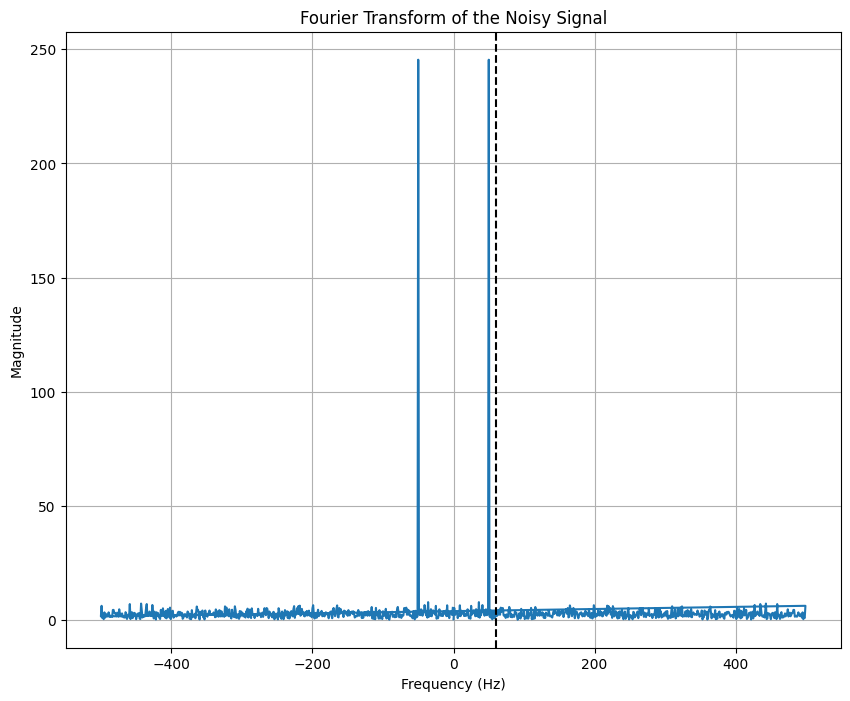

-50.0

In [243]:
# Apply Fourier Transform
from scipy.fft import fft, fftfreq

# Fourier Transform - converts a signal from its original domain, time (t) or space (x) to a representation in the frequency domain
n = len(t)

yf = fft(mixed_signal)

# fft computes the discrete Fourier Transform of the noisy signal

xf = fftfreq(n, 1 / fs)

print(yf)

# fftfreq generates an array of frequencies associated with the components of 'fft'

# Visualizing the Fourier Transform
plt.figure(figsize=(10, 8))
plt.plot(xf, np.abs(yf))
plt.title('Fourier Transform of the Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.axvline(x=60, color = 'k', linestyle='--')
plt.grid()
plt.show()

# plt.figure(figsize=(10, 5))
# plt.plot(xf, yf)
# plt.yscale('log')  # Log scale might help emphasize differences
# plt.ylim(1, 100)  # Adjust based on your actual data range
# plt.title('Frequency Spectrum with Log Scale')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude (Log Scale)')
# plt.grid(True)
# plt.show()

xf[950]

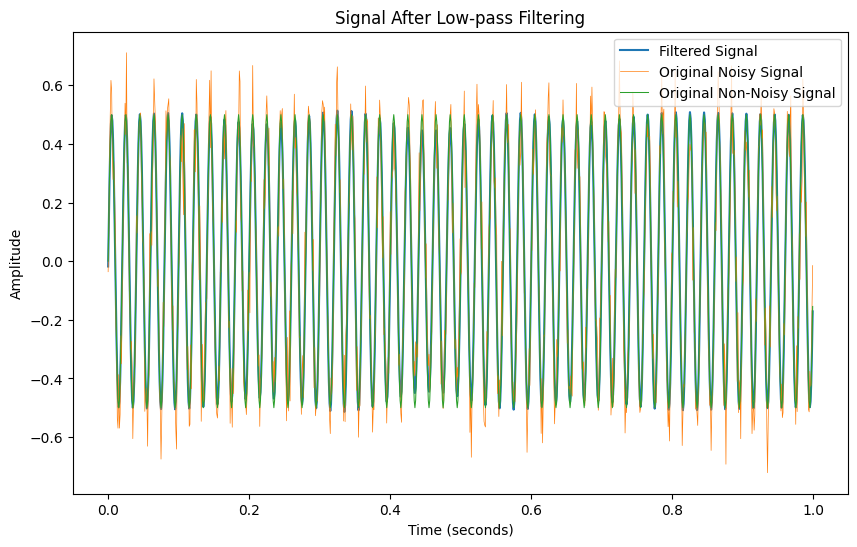

In [247]:
# Implementing a filter 

# Low-pass filter - filter that passes signals with a frequency lower than a selected cutoff frequency and attenuates signals with frequencies higher than the cutoff frequency 

# cutoff = 60  # Cutoff frequency in Hz - defines the threshold above which frequencies will be considered noise and thus set to 0.
# yf[(xf > cutoff) | (xf < -cutoff)] = 0 
# # print(yf)
# filtered_signal = np.real(np.fft.ifft(yf))

# option two
# Define your filter bounds
lower_bound1 = -55
upper_bound1 = 55
lower_bound2 = -45
upper_bound2 = 45

# Apply filtering: zero out data outside [-60, -40] U [40, 60]
filtered_yf = np.where((np.abs(xf) > upper_bound1) | ((np.abs(xf) < upper_bound2) & (np.abs(xf) > lower_bound2)), 0, yf)
filtered_signal = np.real(np.fft.ifft(filtered_yf))


# after modifying the frequency domain representation (yf), an inverse FFT is applied to convert it back to the time domain, resulting in the filtered signal

# Plotting the filtered signal
plt.figure(figsize=(10, 6))
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.plot(t, mixed_signal, label='Original Noisy Signal', linewidth=0.5)
plt.plot(t, signal, label='Original Non-Noisy Signal', linewidth=0.75)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Signal After Low-pass Filtering')
plt.show()


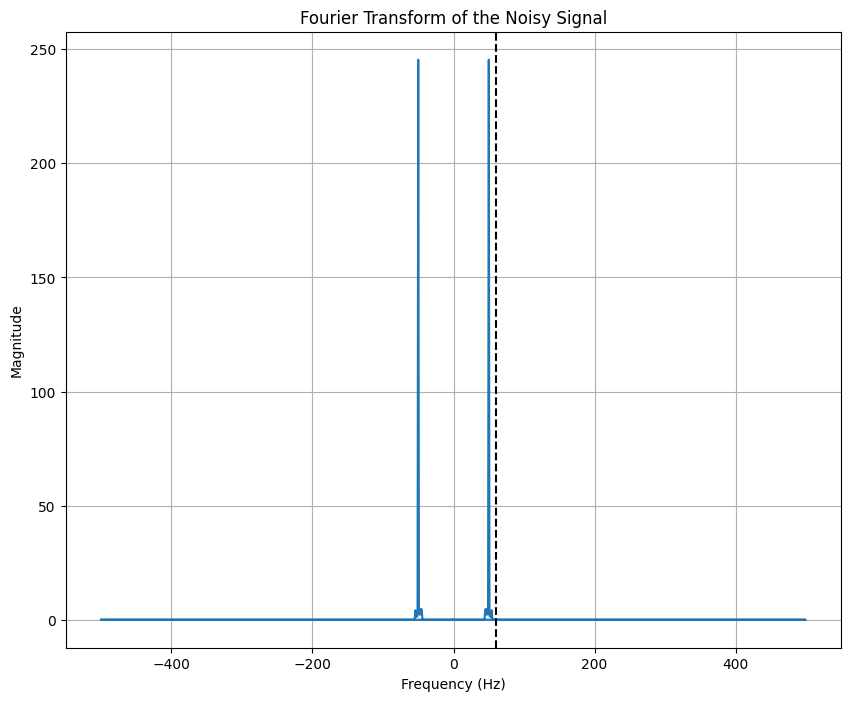

In [245]:

lower_bound1 = -55
upper_bound1 = 55
lower_bound2 = -45
upper_bound2 = 45

# Apply filtering: zero out data outside [-60, -40] U [40, 60]
filtered_yf = np.where((np.abs(xf) > upper_bound1) | ((np.abs(xf) < upper_bound2) & (np.abs(xf) > lower_bound2)), 0, yf)

plt.figure(figsize=(10, 8))
plt.plot(xf, np.abs(filtered_yf))
plt.title('Fourier Transform of the Noisy Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.axvline(x=60, color = 'k', linestyle='--')
plt.grid()
plt.show()

In [ ]:

# after modifying the frequency domain representation (yf), an inverse FFT is applied to convert it back to the time domain, resulting in the filtered signal

# Plotting the filtered signal
plt.figure(figsize=(10, 6))
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.plot(t, mixed_signal, label='Original Noisy Signal', linewidth=0.5)
# plt.plot(t, signal, label='Original Non-Noisy Signal', linewidth=0.75)
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Signal After Low-pass Filtering')
plt.show()
